In [1]:
# Gender,Age,Occupation,Student Status,Average Grade (Expect),Average ECTS (Expect),ECTS Summer,ECTS Winter,Grade Summer (AVG),Grade Winter (AVG)


import pandas as pd
import numpy as np
from pathlib import Path
import dfutil as dfu

In [2]:
file_path = Path('data.csv')
if file_path.exists():
	df = pd.read_csv(file_path)
else:
	print(f"File {file_path} does not exist.")

df = dfu.prepare_DF(df)	
len(df)


0.1999999999999995 3.4000000000000004
after removing grade summer outliers 53
0.5499999999999998 3.1900000000000004
after removing grade winter outliers 52
15.0 39.0
after removing ects summer outliers 43
15.0 39.0
after removing ects winter outliers 39


39

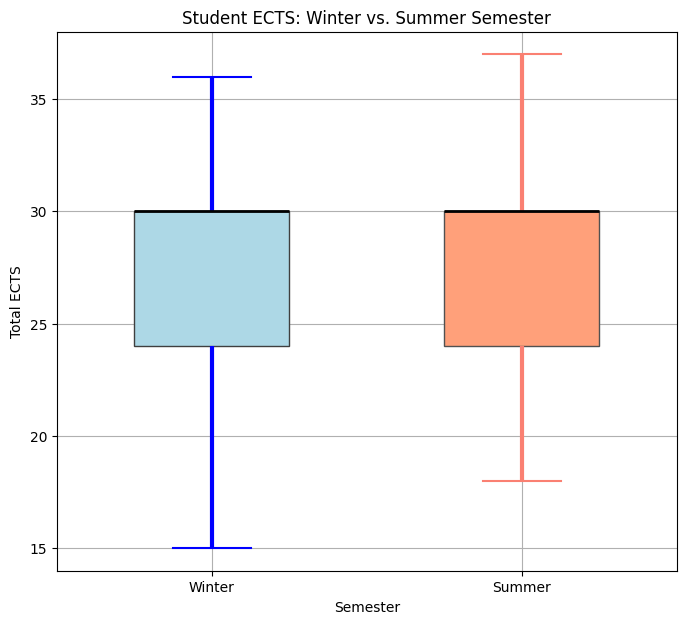

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

df["ECTS Winter"] = df["ECTS Winter"].astype(str).str.replace(",", ".").astype(float)
df["ECTS Summer"] = df["ECTS Summer"].astype(str).str.replace(",", ".").astype(float)

# Convert DataFrame to long format for boxplot
df_long = df.melt(value_vars=["ECTS Winter", "ECTS Summer"], 
                  var_name="Semester", value_name="ECTS")

# Rename semester labels
df_long["Semester"] = df_long["Semester"].replace({"ECTS Winter": "Winter", 
                                                   "ECTS Summer": "Summer"})

plt.figure(figsize=(8, 7))  # Make the plot taller by increasing the height

# 🎯 1. Add Boxplot for Winter (Light Blue)
sns.boxplot(x="Semester", y="ECTS", data=df_long[df_long["Semester"] == "Winter"], width=0.5, showfliers=True, 
            boxprops={'facecolor': 'lightblue'}, 
            whiskerprops={'color': 'blue', 'linewidth': 3},  # Thicker whisker lines
            capprops={'color': 'blue', 'linewidth': 1.5},
            flierprops={'marker': 'o', 'color': 'black', 'alpha': 0.7},
            medianprops={'color': 'black', 'linewidth': 2})

# 🎯 2. Add Boxplot for Summer (Light Orange)
sns.boxplot(x="Semester", y="ECTS", data=df_long[df_long["Semester"] == "Summer"], width=0.5, showfliers=True, 
            boxprops={'facecolor': 'lightsalmon'},  # Light Orange (light salmon)
            whiskerprops={'color': 'salmon', 'linewidth': 3},  # Thicker whisker lines
            capprops={'color': 'salmon', 'linewidth': 1.5},
            flierprops={'marker': 'o', 'color': 'black', 'alpha': 0.7},
            medianprops={'color': 'black', 'linewidth': 2})

# 🔽 Invert Y-axis so lower grades (better) are at the top
plt.gca().invert_yaxis()

# Add padding to the x-axis (adjust space to the left and right)
plt.xlim(-0.5, 1.5)  # Padding on both sides

plt.ylim(min(df[["ECTS Winter", "ECTS Summer"]].min()-1), 
         max(df[["ECTS Winter", "ECTS Summer"]].max()+1))

plt.xlabel("Semester")
plt.ylabel("Total ECTS")
plt.title("Student ECTS: Winter vs. Summer Semester")
plt.grid(True)

plt.savefig("boxplot_ECTS.svg", format="svg")

plt.show()


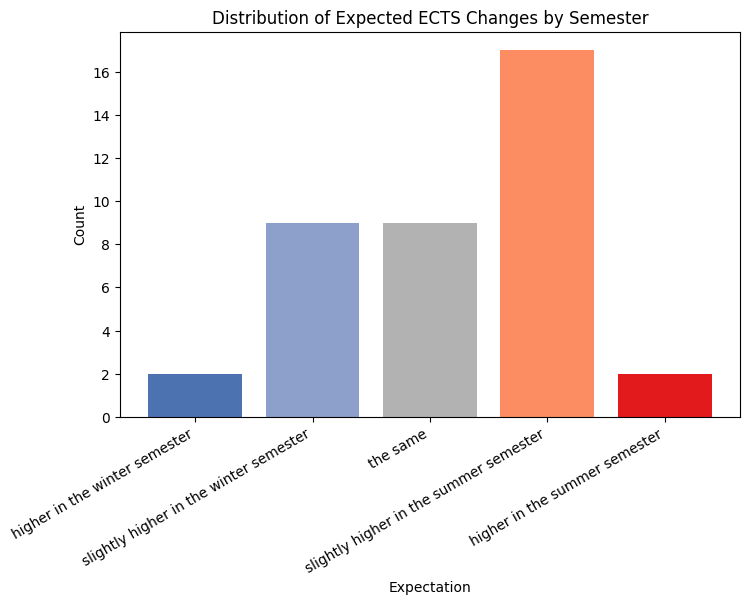

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Define the expected order of categories (all lowercase, replacing 'better' with 'higher')
categories = [
    "higher in the winter semester",
    "slightly higher in the winter semester",
    "the same",
    "slightly higher in the summer semester",
    "higher in the summer semester"
]

# Count occurrences and reorder based on defined categories
value_counts = df["Average ECTS (Expect)"].value_counts()
value_counts = value_counts.reindex(categories, fill_value=0)  # Ensure correct order

# Create the bar plot
plt.figure(figsize=(8, 5))  # Keep figure compact
plt.bar(value_counts.index, value_counts.values, color=["#4c72b0", "#8da0cb", "#b2b2b2", "#fc8d62", "#e31a1c"])

# Labels and title
plt.xlabel("Expectation")
plt.ylabel("Count")
plt.title("Distribution of Expected ECTS Changes by Semester")

# Rotate labels for better readability
plt.xticks(rotation=30, ha="right")  

# Ensure Y-axis only shows whole numbers
plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Save as SVG without cutting off labels
plt.savefig("bar_chart_ects.svg", format="svg", bbox_inches="tight", dpi=300)

# Show the plot
plt.show()




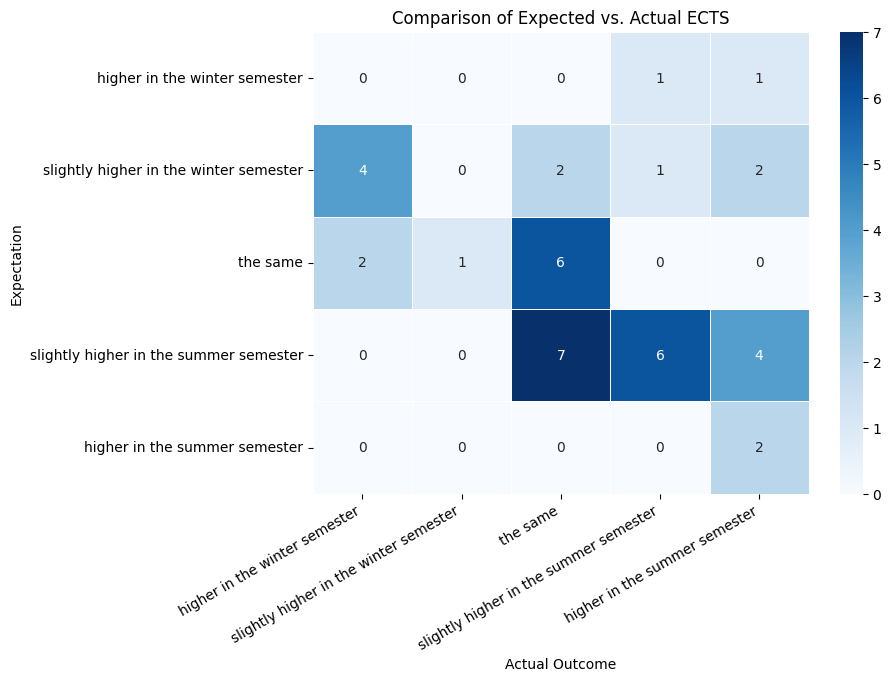

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define categories (same structure as expectation column, adding 'slightly higher')
categories = [
    "higher in the winter semester",
    "slightly higher in the winter semester",
    "the same",
    "slightly higher in the summer semester",
    "higher in the summer semester"
]

# Create the actual category based on numerical ECTS values
def categorize_actual(row):
    winter_ects = row["ECTS Winter"]
    summer_ects = row["ECTS Summer"]
    diff = winter_ects - summer_ects
    
    if diff > 3:
        return "higher in the winter semester"
    elif diff <= 3 and diff > 0:
        return "slightly higher in the winter semester"
    elif diff == 0:
        return "the same"
    elif diff >= -3 and diff < 0:
        return "slightly higher in the summer semester"
    else:
        return "higher in the summer semester"

df["Actual Category"] = df.apply(categorize_actual, axis=1)

# Create a contingency table (how often each expectation matches actual)
conf_matrix = pd.crosstab(df["Average ECTS (Expect)"], df["Actual Category"])

# Reorder rows and columns to ensure consistency
conf_matrix = conf_matrix.reindex(index=categories, columns=categories, fill_value=0)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5)

# Labels and title
plt.xlabel("Actual Outcome")
plt.ylabel("Expectation")
plt.title("Comparison of Expected vs. Actual ECTS")

# Rotate x-axis labels for readability
plt.xticks(rotation=30, ha="right")
plt.yticks(rotation=0)

# Save as SVG
plt.savefig("expectation_vs_actual.svg", format="svg", bbox_inches="tight", dpi=300)

plt.show()




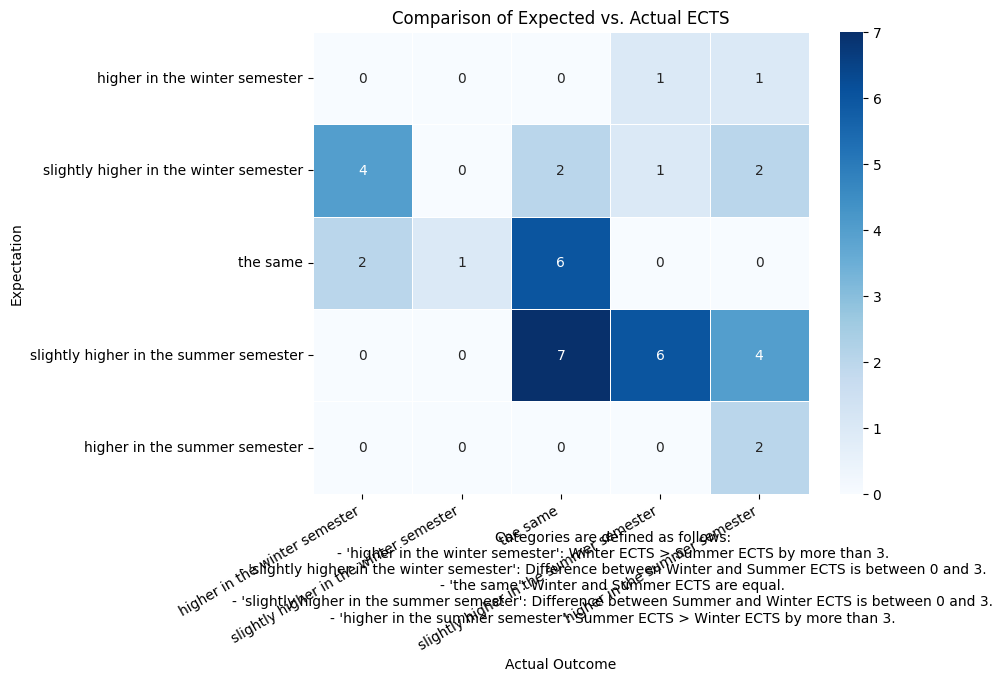

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define categories (same structure as expectation column, adding 'slightly higher')
categories = [
    "higher in the winter semester",
    "slightly higher in the winter semester",
    "the same",
    "slightly higher in the summer semester",
    "higher in the summer semester"
]

# Create the actual category based on numerical ECTS values
def categorize_actual(row):
    winter_ects = row["ECTS Winter"]
    summer_ects = row["ECTS Summer"]
    diff = winter_ects - summer_ects
    
    if diff > 3:
        return "higher in the winter semester"
    elif diff <= 3 and diff > 0:
        return "slightly higher in the winter semester"
    elif diff == 0:
        return "the same"
    elif diff >= -3 and diff < 0:
        return "slightly higher in the summer semester"
    else:
        return "higher in the summer semester"

df["Actual Category"] = df.apply(categorize_actual, axis=1)

# Create a contingency table (how often each expectation matches actual)
conf_matrix = pd.crosstab(df["Average ECTS (Expect)"], df["Actual Category"])

# Reorder rows and columns to ensure consistency
conf_matrix = conf_matrix.reindex(index=categories, columns=categories, fill_value=0)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5)

# Labels and title
plt.xlabel("Actual Outcome")
plt.ylabel("Expectation")
plt.title("Comparison of Expected vs. Actual ECTS")

# Rotate x-axis labels for readability
plt.xticks(rotation=30, ha="right")
plt.yticks(rotation=0)

# Add caption explaining category definitions
caption = (
    "Categories are defined as follows:\n"
    "- 'higher in the winter semester': Winter ECTS > Summer ECTS by more than 3.\n"
    "- 'slightly higher in the winter semester': Difference between Winter and Summer ECTS is between 0 and 3.\n"
    "- 'the same': Winter and Summer ECTS are equal.\n"
    "- 'slightly higher in the summer semester': Difference between Summer and Winter ECTS is between 0 and 3.\n"
    "- 'higher in the summer semester': Summer ECTS > Winter ECTS by more than 3."
)

# Add the caption below the plot
plt.figtext(0.5, -0.1, caption, wrap=True, ha="center", fontsize=10)

# Save as SVG
plt.savefig("expectation_vs_actual_with_caption.svg", format="svg", bbox_inches="tight", dpi=300)

plt.show()


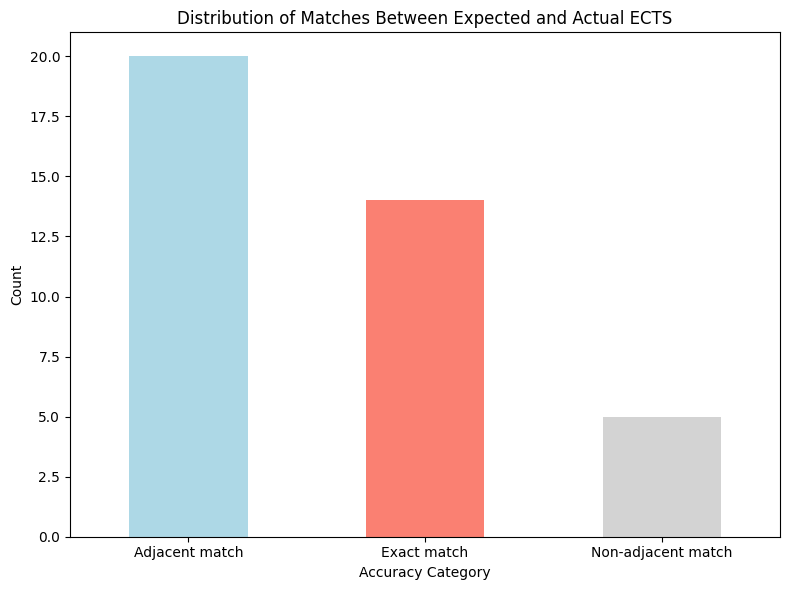

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Define categories for ECTS (with a 3 ECTS threshold for "slightly" higher)
categories_ects = [
    "higher in the winter semester",
    "slightly higher in the winter semester",
    "the same",
    "slightly higher in the summer semester",
    "higher in the summer semester"
]

# Create the actual category based on numerical ECTS values
def categorize_actual_ects(row):
    winter_ects = row["ECTS Winter"]
    summer_ects = row["ECTS Summer"]
    diff = winter_ects - summer_ects
    
    if diff > 3:
        return "higher in the winter semester"
    elif diff <= 3 and diff > 0:
        return "slightly higher in the winter semester"
    elif diff == 0:
        return "the same"
    elif diff >= -3 and diff < 0:
        return "slightly higher in the summer semester"
    else:
        return "higher in the summer semester"

df["Actual ECTS Category"] = df.apply(categorize_actual_ects, axis=1)

# Function to determine if the estimation was an exact match, adjacent match, or non-adjacent match for ECTS
def estimate_accuracy_ects(row):
    expected = row["Average ECTS (Expect)"]
    actual = row["Actual ECTS Category"]
    
    if expected == actual:
        return "Exact match"
    
    # Find categories that are adjacent
    adjacent_categories_ects = {
        "higher in the winter semester": ["slightly higher in the winter semester", "slightly higher in the summer semester"],
        "slightly higher in the winter semester": ["higher in the winter semester", "the same", "slightly higher in the summer semester"],
        "the same": ["slightly higher in the winter semester", "slightly higher in the summer semester"],
        "slightly higher in the summer semester": ["the same", "slightly higher in the winter semester", "higher in the summer semester"],
        "higher in the summer semester": ["slightly higher in the summer semester", "slightly higher in the winter semester"]
    }
    
    if expected in adjacent_categories_ects and actual in adjacent_categories_ects[expected]:
        return "Adjacent match"
    
    return "Non-adjacent match"

df["Estimate Accuracy ECTS"] = df.apply(estimate_accuracy_ects, axis=1)

# Create a count of the accuracy categories for ECTS
accuracy_counts_ects = df["Estimate Accuracy ECTS"].value_counts()

# Create a bar plot for ECTS
plt.figure(figsize=(8, 6))
accuracy_counts_ects.plot(kind="bar", color=["lightblue", "salmon", "lightgray"])

# Labels and title
plt.xlabel("Accuracy Category")
plt.ylabel("Count")
plt.title("Distribution of Matches Between Expected and Actual ECTS")

# Show the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("bar_chart_ects_accuracy.svg", format="svg")
plt.show()
